In [1]:
import datetime

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [5]:
import sys
# sys.path.append(r'C:\Users\3876yl\Documents\prodpy')
sys.path.append(r'C:\Users\user\Documents\GitHub\prodpy')

In [6]:
from prodpy import timeview as tv
from prodpy import decline as dc

2024-05-14 04:45:14.882 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [7]:
# df = pd.read_excel(r"C:\Users\3876yl\OneDrive - BP\Documents\ACG_decline_curve_analysis.xlsx")
df = pd.read_excel(r"C:\Users\user\Downloads\ACG_decline_curve_analysis.xlsx")

In [8]:
data = tv.Outlook(df)

In [9]:
group1 = data.get_group(groupkey='Field',datekey='Date')

In [10]:
group1.frame

,Field,Date,"Actual Oil, Mstb/d","Actual Gas, MMscf/d","Actual Water, Mstb/d","Actual GI, MMscf/d","Actual WI, Mstb/d","Actual Gas Lift, MMscf/d"
0,Azeri,2005-02-28,14.941716,10.463551,0.013523,0.0,0.000000,0
1,Azeri,2005-03-31,67.047661,46.697971,0.035730,0.0,0.000000,0
2,Azeri,2005-04-30,66.272300,46.060708,0.052709,0.0,0.000000,0
3,Azeri,2005-05-31,108.933643,86.013518,0.039977,0.0,0.000000,0
4,Azeri,2005-06-30,136.323414,120.857721,0.034051,0.0,0.000000,0
...,...,...,...,...,...,...,...,...
692,DWG,2022-09-30,74.162230,77.825791,54.011896,0.0,161.635550,0
693,DWG,2022-10-31,72.813087,95.513492,48.382807,0.0,161.445631,0
694,DWG,2022-11-30,73.619149,115.041963,47.827376,0.0,165.353463,0
695,DWG,2022-12-31,74.893733,115.062408,45.208545,0.0,175.371385,0


In [11]:
group2 = data.get_group('Actual Oil, Mstb/d',groupkey='Field',datekey='Date')

In [12]:
group2.frame

,Field,Date,"Actual Oil, Mstb/d"
0,Azeri,2005-02-28,14.941716
1,Azeri,2005-03-31,67.047661
2,Azeri,2005-04-30,66.272300
3,Azeri,2005-05-31,108.933643
4,Azeri,2005-06-30,136.323414
...,...,...,...
692,DWG,2022-09-30,74.162230
693,DWG,2022-10-31,72.813087
694,DWG,2022-11-30,73.619149
695,DWG,2022-12-31,74.893733


In [13]:
group1.filter('Azeri')

,Date,"Actual Oil, Mstb/d","Actual Gas, MMscf/d","Actual Water, Mstb/d","Actual GI, MMscf/d","Actual WI, Mstb/d","Actual Gas Lift, MMscf/d"
0,2005-02-28,14.941716,10.463551,0.013523,0.000000,0.000000,0
1,2005-03-31,67.047661,46.697971,0.035730,0.000000,0.000000,0
2,2005-04-30,66.272300,46.060708,0.052709,0.000000,0.000000,0
3,2005-05-31,108.933643,86.013518,0.039977,0.000000,0.000000,0
4,2005-06-30,136.323414,120.857721,0.034051,0.000000,0.000000,0
...,...,...,...,...,...,...,...
211,2022-09-30,266.410824,1040.638469,69.323626,976.607142,166.244929,0
212,2022-10-31,269.007960,1050.010403,71.475107,985.973021,155.847161,0
213,2022-11-30,271.833662,1101.043547,73.164691,884.976364,211.623015,0
214,2022-12-31,271.006556,1142.963175,71.195901,1028.372861,211.808822,0


In [16]:
for frame in group2:
    break

In [17]:
frame

,Date,"Actual Oil, Mstb/d"
0,2005-02-28,14.941716
1,2005-03-31,67.047661
2,2005-04-30,66.272300
3,2005-05-31,108.933643
4,2005-06-30,136.323414
...,...,...
211,2022-09-30,266.410824
212,2022-10-31,269.007960
213,2022-11-30,271.833662
214,2022-12-31,271.006556


In [21]:
fig1 = make_subplots(rows=1, cols=2)

print(type(fig1))

<class 'plotly.graph_objs._figure.Figure'>


In [22]:
fig2 = go.Figure()

print(type(fig2))

<class 'plotly.graph_objs._figure.Figure'>


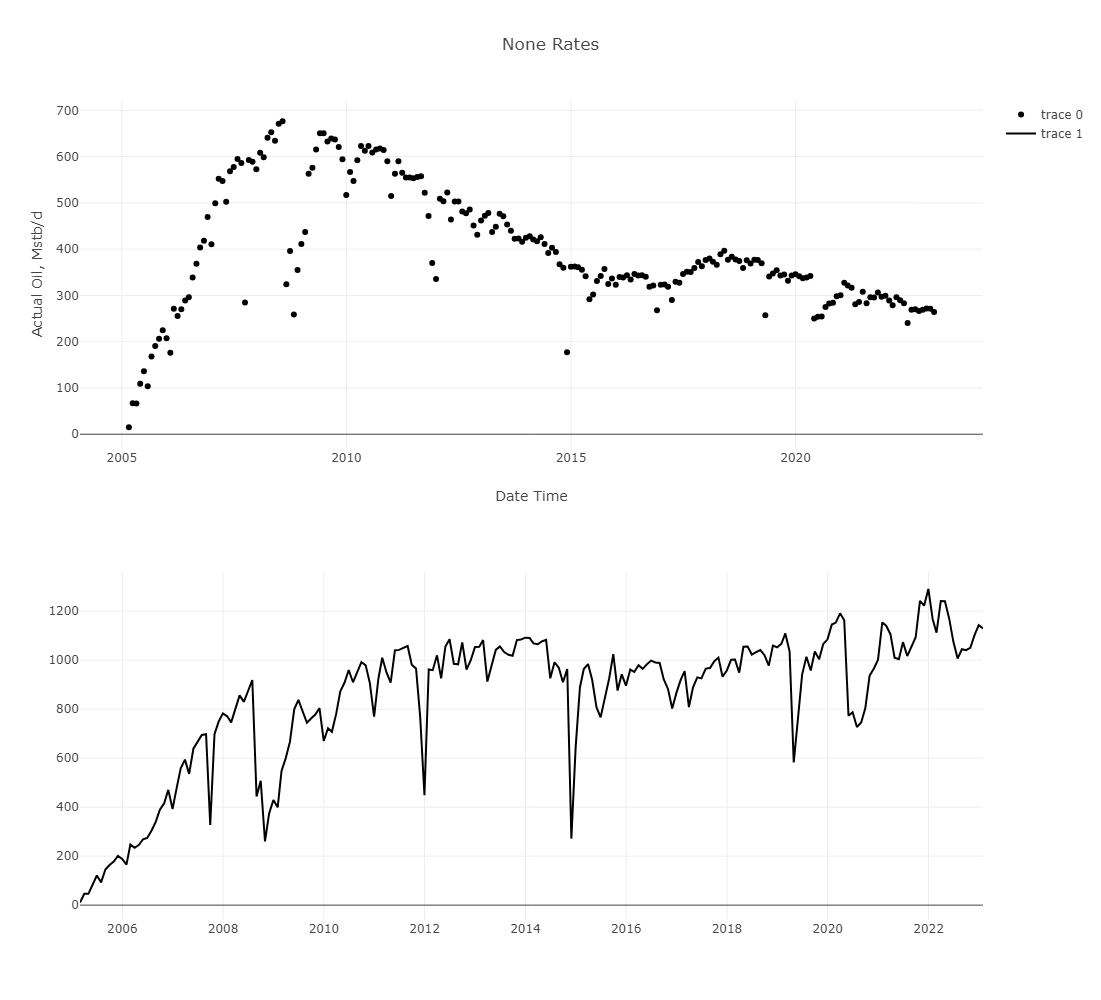

In [27]:
fig = make_subplots(rows=2, cols=1)

data1 = go.Scatter(
    x = frame.iloc[:,0],
    y = frame.iloc[:,1],
    mode = 'markers',
    # opacity = st.session_state.opacity,
    )

fig.add_trace(data1,row=1,col=1)

data2 = go.Scatter(
    x = frame.iloc[:,0],
    y = frame.iloc[:,2],
    mode = 'lines',
    line = dict(color="black"),
    )

fig.add_trace(data2,row=2,col=1)

fig.update_layout(
    height = 1000,
    title = 'None Rates',
    xaxis_title = 'Date Time',
    yaxis_title = 'Actual Oil, Mstb/d',
    
    )

In [20]:
frame.drop(['Field'],axis=1)

,Date,"Actual Oil, Mstb/d","Actual Gas, MMscf/d","Actual Water, Mstb/d","Actual GI, MMscf/d","Actual WI, Mstb/d","Actual Gas Lift, MMscf/d"
0,2005-02-28,14.941716,10.463551,0.013523,0.000000,0.000000,0
1,2005-03-31,67.047661,46.697971,0.035730,0.000000,0.000000,0
2,2005-04-30,66.272300,46.060708,0.052709,0.000000,0.000000,0
3,2005-05-31,108.933643,86.013518,0.039977,0.000000,0.000000,0
4,2005-06-30,136.323414,120.857721,0.034051,0.000000,0.000000,0
...,...,...,...,...,...,...,...
211,2022-09-30,266.410824,1040.638469,69.323626,976.607142,166.244929,0
212,2022-10-31,269.007960,1050.010403,71.475107,985.973021,155.847161,0
213,2022-11-30,271.833662,1101.043547,73.164691,884.976364,211.623015,0
214,2022-12-31,271.006556,1142.963175,71.195901,1028.372861,211.808822,0


In [14]:
frame.iloc[:,1]

0       14.941716
1       67.047661
2       66.272300
3      108.933643
4      136.323414
          ...    
211    266.410824
212    269.007960
213    271.833662
214    271.006556
215    264.201133
Name: Actual Oil, Mstb/d, Length: 216, dtype: float64

In [16]:
frame.shape

(216, 7)

In [13]:
groups.filter('Azeri')

,Field,Date,"Actual Oil, Mstb/d","Actual Gas, MMscf/d","Actual Water, Mstb/d","Actual GI, MMscf/d","Actual WI, Mstb/d","Actual Gas Lift, MMscf/d"
0,Azeri,2005-02-28,14.941716,10.463551,0.013523,0.000000,0.000000,0
1,Azeri,2005-03-31,67.047661,46.697971,0.035730,0.000000,0.000000,0
2,Azeri,2005-04-30,66.272300,46.060708,0.052709,0.000000,0.000000,0
3,Azeri,2005-05-31,108.933643,86.013518,0.039977,0.000000,0.000000,0
4,Azeri,2005-06-30,136.323414,120.857721,0.034051,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
211,Azeri,2022-09-30,266.410824,1040.638469,69.323626,976.607142,166.244929,0
212,Azeri,2022-10-31,269.007960,1050.010403,71.475107,985.973021,155.847161,0
213,Azeri,2022-11-30,271.833662,1101.043547,73.164691,884.976364,211.623015,0
214,Azeri,2022-12-31,271.006556,1142.963175,71.195901,1028.372861,211.808822,0


Index(['Field', 'Platform', 'Flank', 'Depletion Region', 'Well', 'Date',
       'Start Date', 'End Date', 'Duty', 'DTS', 'DHPTG', 'Completion Zones',
       'Actual Oil, Mstb/d', 'Actual Gas, MMscf/d', 'Actual Water, Mstb/d',
       'Actual GI, MMscf/d', 'Actual WI, Mstb/d', 'Actual Gas Lift, MMscf/d'],
      dtype='object')

In [9]:
dca = Analysis(dates="Date",orate="Actual Oil, Mstb/d",grate="Actual Gas, MMscf/d",wrate="Actual Water, Mstb/d")

In [10]:
df['Well'].unique()

array(['A01ST1', 'A01W', 'A01X', 'A02', 'A02W', 'A02Z', 'A03', 'A03Y',
       'A03Z', 'A04', 'A05', 'A05Y', 'A05Z', 'A06', 'A06X', 'A06Y',
       'A06Z', 'A07', 'A07Y', 'A07Z', 'A08', 'A08X', 'A08X_Bal8', 'A08Z',
       'A09', 'A09Y', 'A09Z', 'A09Z_Bal10', 'A10', 'A10X', 'A10Z', 'A11',
       'A11_Bal10', 'A11Z', 'A12', 'A12U', 'A12V', 'A12X', 'A12Z', 'A13',
       'A13W', 'A13X', 'A13ZST1', 'A14U', 'A14V', 'A14Z', 'A15ST1',
       'A16ST3', 'A16W', 'A17ST2', 'A18', 'A18Y', 'A18Y_Bal10', 'A18Z',
       'A19', 'A19Y', 'A20', 'A20Y', 'A20Z', 'A21', 'A22', 'B01ST1',
       'B01Y', 'B02Z', 'B02Z_Bal8', 'B04', 'B04Z', 'B05ST1', 'B05Y',
       'B06', 'B07', 'B08', 'B08Z', 'B09', 'B09Z', 'B10', 'B10Y', 'B11',
       'B11_Bal10', 'B12Z', 'B13ST2', 'B14Z', 'B14Z_Bal10', 'B16W',
       'B16X', 'B17Z', 'B18Y', 'B19', 'B20', 'B21Z', 'B22Z', 'B23Z',
       'B25', 'B26', 'B27', 'B27Z', 'B28', 'B29', 'B30', 'B31', 'B32',
       'B33', 'B34', 'B35', 'B36', 'B37', 'B38Y', 'B39', 'B40', 'B41',
       'B

In [15]:
frame1 = dca.get(df,Well='C24')

In [20]:
frame2 = dca.fit(frame1,start=datetime.date(2011, 3, 1))

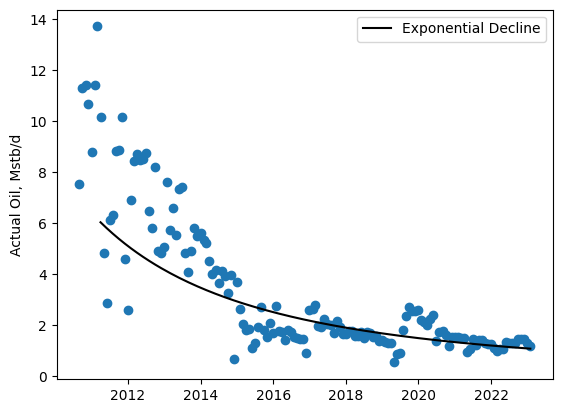

In [21]:
plt.scatter(frame1['Date'],frame1['Actual Oil, Mstb/d'])

plt.plot(frame2['Date'],frame2['TRates'],color='k',label='Exponential Decline')

plt.ylabel('Actual Oil, Mstb/d')

plt.legend()

plt.show()

In [14]:
# lrate = wrate+orate
# wcut  = wrate/lrate*100
# gor   = grate/orate*1000

# df.dtypes;
# category = df.select_dtypes(exclude='number')
# quantity = df.select_dtypes(include='number')
# df.groupby('Date')[quantity.columns].sum();